In [202]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from joblib import dump, load
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.externals import joblib

In [203]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

True


In [204]:
new_file = 'newnew.xlsx'

In [205]:
new_dataframe = pd.read_excel(new_file, sheet_name=0)
new_dataframe1 = pd.read_excel(new_file, sheet_name=2).iloc[:, range(16)]
new_dataframe2 = pd.read_excel(new_file, sheet_name=2).iloc[:, range(17,31)]

In [206]:
# Dataset1
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
性别             158 non-null int64
年龄             158 non-null int64
吸烟             158 non-null int64
部位             158 non-null int64
原发灶大小          158 non-null int64
骨转移            158 non-null int64
脑转移            158 non-null int64
肝转             158 non-null int64
肺内转移           158 non-null int64
胸膜转移           158 non-null int64
治疗方案           158 non-null int64
疗效差0差1好/9个月    158 non-null int64
dtypes: int64(12)
memory usage: 14.9 KB


In [207]:
# Dataset2
new_dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 16 columns):
性别             158 non-null int64
年龄             158 non-null int64
吸烟             158 non-null int64
部位             158 non-null int64
原发灶大小          158 non-null int64
骨转移            158 non-null int64
脑转移            158 non-null int64
肝转             158 non-null int64
肺内转移           158 non-null int64
胸膜转移           158 non-null int64
治疗方案           158 non-null int64
突变情况123        158 non-null int64
TP53           158 non-null int64
rb1            158 non-null int64
pik3ca         158 non-null int64
疗效差1差2好/9个月    158 non-null int64
dtypes: int64(16)
memory usage: 19.9 KB


In [208]:
# Dataset3
new_dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
性别.1             158 non-null int64
年龄.1             158 non-null int64
吸烟.1             158 non-null int64
部位.1             158 non-null int64
原发灶大小.1          158 non-null int64
骨转移.1            158 non-null int64
脑转移.1            158 non-null int64
肝转.1             158 non-null int64
肺内转移.1           158 non-null int64
胸膜转移.1           158 non-null int64
治疗方案.1           158 non-null int64
突变情况123.1        158 non-null int64
N                158 non-null int64
疗效差1差2好/9个月.1    158 non-null int64
dtypes: int64(14)
memory usage: 17.4 KB


## Dataset for outside validation

In [209]:
## outside validation
test_frame1 = pd.read_excel(new_file, sheet_name=1)
test_frame2 = pd.read_excel(new_file, sheet_name=3).iloc[:, range(16)]
test_frame3 = pd.read_excel(new_file, sheet_name=3).iloc[:, range(17,31)]
test_frame1

,性别,年龄,吸烟,部位,原发灶大小,骨转移,脑转移,肝转,肺内转移,胸膜转移,治疗方案,疗效差0差1好/9个月
0,1,56,0,1,1,1,1,1,1,0,1,0
1,2,81,0,2,2,1,1,0,1,1,1,0
2,2,75,0,1,2,1,0,0,1,1,1,0
3,2,74,0,2,1,1,0,1,1,0,1,1
4,1,59,0,1,2,1,0,0,0,1,1,1
5,2,71,0,2,2,1,0,0,1,1,1,1
6,2,51,0,2,3,0,0,0,1,0,1,0
7,1,62,0,1,2,0,0,0,1,1,1,1
8,2,67,0,1,2,1,0,0,1,1,1,1
9,1,77,0,2,2,0,0,0,1,1,1,1


In [210]:
# Dataset1
X_first = new_dataframe.iloc[:,range(0,11)]
y_first = new_dataframe.iloc[:, -1]  # 第二个指标
X_first = np.asarray(X_first)

# Dataset2
X_second = new_dataframe1.iloc[:,range(0,15)]
y_second = new_dataframe1.iloc[:, -1]  # 第二个指标
X_second = np.asarray(X_second)

# Dataset3
X_third = new_dataframe2.iloc[:,range(0,13)]
y_third = new_dataframe2.iloc[:, -1]  # 第二个指标
X_third = np.asarray(X_third)

In [211]:
X_first

array([[ 2, 65,  2, ...,  0,  0,  1],
       [ 1, 68,  1, ...,  1,  0,  1],
       [ 2, 63,  2, ...,  1,  0,  1],
       ...,
       [ 2, 58,  2, ...,  0,  0,  2],
       [ 2, 66,  2, ...,  1,  0,  2],
       [ 2, 52,  2, ...,  0,  0,  2]], dtype=int64)

In [212]:
y_first = np.array(y_first)
y_second = np.array(y_second)
y_third = np.array(y_third)

In [213]:
X_train_first, X_test_first, y_train_first, y_test_first= train_test_split(X_first, y_first, test_size=0.3, random_state=100)
X_test_first = torch.Tensor(X_test_first)
X_train_first = torch.Tensor(X_train_first)
y_train_first = torch.Tensor(y_train_first)
y_test_first = torch.Tensor(y_test_first)
X_train_first

tensor([[ 1., 62.,  1.,  ...,  0.,  0.,  2.],
        [ 1., 58.,  2.,  ...,  0.,  0.,  1.],
        [ 2., 78.,  2.,  ...,  0.,  0.,  1.],
        ...,
        [ 2., 43.,  2.,  ...,  1.,  0.,  2.],
        [ 2., 68.,  2.,  ...,  1.,  0.,  1.],
        [ 2., 55.,  2.,  ...,  0.,  0.,  2.]])

In [214]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X_second, y_second, test_size=0.3, random_state=100)
X_train_second = torch.Tensor(X_train_second)
X_test_second = torch.Tensor(X_test_second)
y_train_second = torch.Tensor(y_train_second)
y_test_second = torch.Tensor(y_test_second)

In [215]:
y_train_second

tensor([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1.])

In [216]:
X_train_third, X_test_third, y_train_third, y_test_third = train_test_split(X_third, y_third, test_size=0.3, random_state=100)
X_train_third, X_test_third, y_train_third, y_test_third = torch.Tensor(X_train_third), torch.Tensor(X_test_third),torch.Tensor(y_train_third),torch.Tensor(y_test_third)

## ANN Training

### Model for Dataset1

In [180]:
class Feedforward_first(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward_first, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.batchnorm = torch.nn.BatchNorm1d(self.hidden_size)
            self.laynorm = torch.nn.LayerNorm(self.input_size)
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size, bias=True)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 5, bias=True)
            self.fc3 = torch.nn.Linear(5, 1, bias=True)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            batchnorm = self.batchnorm(hidden)
            layborm = self.batchnorm(batchnorm)
            relu = self.relu(batchnorm)
            output = self.fc2(relu)
            output = self.fc3(output)
            output = self.sigmoid(output)
            return output

In [181]:
X_train_first.shape[1]

11

In [182]:
model1 = Feedforward_first(X_train_first.shape[1],10)
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.01, weight_decay= 0.001)

In [183]:
model1.train()
epoch = 100
loss_array = []
for epoch in range(epoch):
    optimizer1.zero_grad()
    # Forward pass
    y_pred = model1(X_train_first)
    # Compute Loss
    loss = criterion1(y_pred.squeeze(), y_train_first)
    loss_array.append(float(loss.item()))
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer1.step()

Epoch 0: train loss: 0.6244868040084839
Epoch 1: train loss: 0.6133076548576355
Epoch 2: train loss: 0.6051017045974731
Epoch 3: train loss: 0.5989736318588257
Epoch 4: train loss: 0.5943288207054138
Epoch 5: train loss: 0.5894075632095337
Epoch 6: train loss: 0.5836519002914429
Epoch 7: train loss: 0.5773817300796509
Epoch 8: train loss: 0.5706023573875427
Epoch 9: train loss: 0.5638580322265625
Epoch 10: train loss: 0.5584702491760254
Epoch 11: train loss: 0.5518344640731812
Epoch 12: train loss: 0.5441088080406189
Epoch 13: train loss: 0.5366925001144409
Epoch 14: train loss: 0.5275519490242004
Epoch 15: train loss: 0.5171442031860352
Epoch 16: train loss: 0.5066359639167786
Epoch 17: train loss: 0.49640965461730957
Epoch 18: train loss: 0.48884525895118713
Epoch 19: train loss: 0.4825907051563263
Epoch 20: train loss: 0.4774806499481201
Epoch 21: train loss: 0.47192177176475525
Epoch 22: train loss: 0.4659217894077301
Epoch 23: train loss: 0.4597175121307373
Epoch 24: train loss: 0

Text(0, 0.5, 'Loss Value')

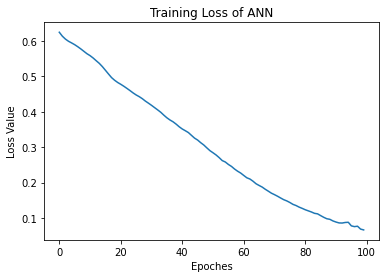

In [184]:
plt.plot(loss_array)
plt.title("Training Loss of ANN")
plt.xlabel("Epoches")
plt.ylabel("Loss Value")

In [185]:
model1.eval()
y_pred = model1(X_test_first)
y_pred_int = []

for item in y_pred:
    y_pred_int.append(round(float(item[0])))
print(y_pred_int)
print(y_test_first)
print(np.sum(y_pred_int==np.array(y_test_first))/len(y_pred_int))

[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])
0.7083333333333334


In [222]:
### accuracy on training set
y_pred = model1(X_train_first)
y_pred_int = []

for item in y_pred:
    y_pred_int.append(round(float(item[0])))
print(y_pred_int)
print(y_train_first)
print(np.sum(y_pred_int==np.array(y_train_first))/len(y_pred_int))

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
tensor([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1.])
0.7545454545454545


### Model for Dataset2

In [186]:
class Feedforward_second(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward_second, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.batchnorm = torch.nn.BatchNorm1d(self.input_size)
            self.laynorm = torch.nn.LayerNorm(self.input_size)
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size, bias=True)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 5, bias=True)
            self.fc3 = torch.nn.Linear(5, 1, bias=True)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            batchnorm = self.batchnorm(hidden)
            laynorm = self.laynorm(batchnorm)
            relu = self.relu(laynorm)
            output = self.fc2(relu)
            output = self.fc3(output)
            output = self.sigmoid(output)
            return output

In [187]:
X_train_second

tensor([[ 1., 62.,  1.,  ...,  1.,  0.,  0.],
        [ 1., 58.,  2.,  ...,  0.,  0.,  0.],
        [ 2., 78.,  2.,  ...,  1.,  0.,  0.],
        ...,
        [ 2., 43.,  2.,  ...,  1.,  0.,  0.],
        [ 2., 68.,  2.,  ...,  1.,  0.,  0.],
        [ 2., 55.,  2.,  ...,  0.,  0.,  1.]])

In [188]:
model2 = Feedforward_second(X_train_second.shape[1],15)
criterion2 = torch.nn.BCELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr = 0.01, weight_decay= 0.001)

In [189]:
model2.train()
epoch = 100
loss_array = []
for epoch in range(epoch):
    optimizer2.zero_grad()
    # Forward pass
    y_pred = model2(X_train_second)
    # Compute Loss
    loss = criterion2(y_pred.squeeze(), y_train_second)
    loss_array.append(float(loss.item()))
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer2.step()

Epoch 0: train loss: 0.6970109939575195
Epoch 1: train loss: 0.6656602621078491
Epoch 2: train loss: 0.6438060998916626
Epoch 3: train loss: 0.626984179019928
Epoch 4: train loss: 0.6120418310165405
Epoch 5: train loss: 0.5975006818771362
Epoch 6: train loss: 0.5842530727386475
Epoch 7: train loss: 0.5728676319122314
Epoch 8: train loss: 0.5620989203453064
Epoch 9: train loss: 0.5516068339347839
Epoch 10: train loss: 0.5413016676902771
Epoch 11: train loss: 0.5305013656616211
Epoch 12: train loss: 0.5187814831733704
Epoch 13: train loss: 0.5066744089126587
Epoch 14: train loss: 0.4929675757884979
Epoch 15: train loss: 0.4781721532344818
Epoch 16: train loss: 0.4617183208465576
Epoch 17: train loss: 0.4444705843925476
Epoch 18: train loss: 0.42662888765335083
Epoch 19: train loss: 0.40823912620544434
Epoch 20: train loss: 0.38884103298187256
Epoch 21: train loss: 0.36930304765701294
Epoch 22: train loss: 0.3503008782863617
Epoch 23: train loss: 0.3339758813381195
Epoch 24: train loss: 0

In [190]:
torch.save(model2, "ann_model.pt")

Text(0, 0.5, 'Loss Value')

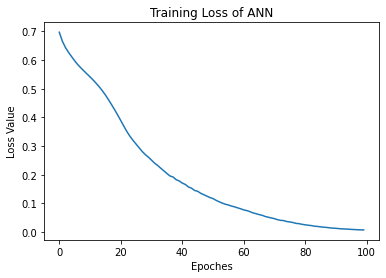

In [191]:
plt.plot(loss_array)
plt.title("Training Loss of ANN")
plt.xlabel("Epoches")
plt.ylabel("Loss Value")

In [192]:
model2.eval()
y_pred = model2(X_train_second)
y_pred_int = []

for item in y_pred:
    y_pred_int.append(round(float(item[0])))
print(y_pred_int)
print(y_train_second)
print(np.sum(y_pred_int==np.array(y_train_second))/len(y_train_second))

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
tensor([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1.])
0.8909090909090909


In [223]:
### accuracy on training set
y_pred = model2(X_train_second)
y_pred_int = []

for item in y_pred:
    y_pred_int.append(round(float(item[0])))
print(y_pred_int)
print(y_train_second)
print(np.sum(y_pred_int==np.array(y_train_second))/len(y_pred_int))

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
tensor([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1.])
0.8909090909090909


### Model for Dataset3

In [217]:
class Feedforward_third(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward_third, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.batchnorm = torch.nn.BatchNorm1d(self.hidden_size)
            self.laynorm = torch.nn.LayerNorm(self.input_size)
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size, bias=True)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 5, bias=True)
            self.fc3 = torch.nn.Linear(5, 1, bias=True)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            batchnorm = self.batchnorm(hidden)
            laynorm = self.laynorm(batchnorm)
            relu = self.relu(laynorm)
            output = self.fc2(relu)
            output = self.fc3(output)
            output = self.sigmoid(output)
            return output

In [218]:
model3 = Feedforward_third(X_train_third.shape[1],13)
criterion3 = torch.nn.BCELoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr = 0.01, weight_decay= 0.001)

In [219]:
model3.train()
epoch = 100
loss_array = []
for epoch in range(epoch):
    optimizer3.zero_grad()
    # Forward pass
    y_pred = model3(X_train_third)
    # Compute Loss
    loss = criterion3(y_pred.squeeze(), y_train_third)
    loss_array.append(float(loss.item()))
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer3.step()

Epoch 0: train loss: 0.687207818031311
Epoch 1: train loss: 0.6589178442955017
Epoch 2: train loss: 0.6377346515655518
Epoch 3: train loss: 0.6212764978408813
Epoch 4: train loss: 0.6082321405410767
Epoch 5: train loss: 0.5975087285041809
Epoch 6: train loss: 0.588122546672821
Epoch 7: train loss: 0.5793818831443787
Epoch 8: train loss: 0.5716533064842224
Epoch 9: train loss: 0.564481794834137
Epoch 10: train loss: 0.5579599738121033
Epoch 11: train loss: 0.551609456539154
Epoch 12: train loss: 0.544535219669342
Epoch 13: train loss: 0.5362147688865662
Epoch 14: train loss: 0.5263724327087402
Epoch 15: train loss: 0.5149628520011902
Epoch 16: train loss: 0.5031763911247253
Epoch 17: train loss: 0.4914756715297699
Epoch 18: train loss: 0.47966742515563965
Epoch 19: train loss: 0.4669191241264343
Epoch 20: train loss: 0.4529743492603302
Epoch 21: train loss: 0.43830907344818115
Epoch 22: train loss: 0.42560625076293945
Epoch 23: train loss: 0.413156121969223
Epoch 24: train loss: 0.40058

Text(0, 0.5, 'Loss Value')

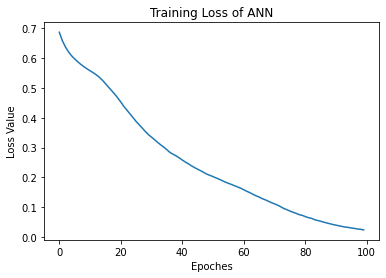

In [220]:
plt.plot(loss_array)
plt.title("Training Loss of ANN")
plt.xlabel("Epoches")
plt.ylabel("Loss Value")

In [221]:
model3.eval()
y_pred = model3(X_train_third)
y_pred_int = []

for item in y_pred:
    y_pred_int.append(round(float(item[0])))
    
print(len(y_pred_int))
print(len(y_train_third))
y_train_third = np.array(y_train_third)
print(np.sum(y_pred_int==y_train_third)/len(y_pred_int))

110
110
0.8636363636363636


In [224]:
### accuracy on training set
y_pred = model3(X_train_third)
y_pred_int = []

for item in y_pred:
    y_pred_int.append(round(float(item[0])))
print(y_pred_int)
print(y_train_third)
print(np.sum(y_pred_int==np.array(y_train_third))/len(y_pred_int))

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
0.8636363636363636


## Outside Validation

In [225]:
new_file = f'外部验证最新.xlsx'

In [226]:
new_dataframe2 = pd.read_excel(new_file, sheet_name=0)
new_dataframe2

,性别,年龄,吸烟,部位,原发灶大小,骨转移,脑转移,肝转,肺内转移,胸膜转移,治疗方案,突变情况123,TP53,rb1,pik3ca,result,ANN
0,1,56,0,1,1,1,1,1,1,0,1,2,1,0,0,0,1
1,2,81,0,2,2,1,1,0,1,1,1,2,0,0,0,0,0
2,2,75,0,1,2,1,0,0,1,1,1,2,0,0,0,0,1
3,2,74,0,2,1,1,0,1,1,0,1,1,0,0,0,1,1
4,1,59,0,1,2,1,0,0,0,1,1,1,0,0,0,1,1
5,2,71,0,2,2,1,0,0,1,1,1,2,1,0,0,0,1
6,2,51,0,2,3,0,0,0,1,0,1,3,0,1,0,0,0
7,1,62,0,1,1,0,0,0,1,1,1,2,0,0,0,1,1
8,2,67,0,1,2,1,0,0,1,1,1,2,1,0,0,1,0
9,1,77,0,2,2,0,0,0,1,1,1,1,1,0,0,1,1


In [227]:
x_test_frame2 = new_dataframe2.iloc[:,range(15)]
x_test_frame2 = torch.Tensor(np.array(x_test_frame2))
x_test_frame2

tensor([[ 1., 56.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  0.,
          0.],
        [ 2., 81.,  0.,  2.,  2.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,
          0.],
        [ 2., 75.,  0.,  1.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,
          0.],
        [ 2., 74.,  0.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
          0.],
        [ 1., 59.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
          0.],
        [ 2., 71.,  0.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  1.,  0.,
          0.],
        [ 2., 51.,  0.,  2.,  3.,  0.,  0.,  0.,  1.,  0.,  1.,  3.,  0.,  1.,
          0.],
        [ 1., 62.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,
          0.],
        [ 2., 67.,  0.,  1.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  1.,  0.,
          0.],
        [ 1., 77.,  0.,  2.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
          0.],
        [ 2., 85.,  0.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,  

In [228]:
new_dataframe2

,性别,年龄,吸烟,部位,原发灶大小,骨转移,脑转移,肝转,肺内转移,胸膜转移,治疗方案,突变情况123,TP53,rb1,pik3ca,result,ANN
0,1,56,0,1,1,1,1,1,1,0,1,2,1,0,0,0,1
1,2,81,0,2,2,1,1,0,1,1,1,2,0,0,0,0,0
2,2,75,0,1,2,1,0,0,1,1,1,2,0,0,0,0,1
3,2,74,0,2,1,1,0,1,1,0,1,1,0,0,0,1,1
4,1,59,0,1,2,1,0,0,0,1,1,1,0,0,0,1,1
5,2,71,0,2,2,1,0,0,1,1,1,2,1,0,0,0,1
6,2,51,0,2,3,0,0,0,1,0,1,3,0,1,0,0,0
7,1,62,0,1,1,0,0,0,1,1,1,2,0,0,0,1,1
8,2,67,0,1,2,1,0,0,1,1,1,2,1,0,0,1,0
9,1,77,0,2,2,0,0,0,1,1,1,1,1,0,0,1,1


In [229]:
y_test_frame2 = new_dataframe2.iloc[:,-2]
y_test_frame2 = np.array(y_test_frame2)
y_test_frame2

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [230]:
y_pred_outside = model2(x_test_frame2)
y_pred_outside_int = []

for item in y_pred_outside:
    y_pred_outside_int.append(round(float(item[0])))

y_pred_outside_int = np.array(y_pred_outside_int)
print(y_pred_outside_int)
print(y_test_frame2)
print(np.sum(y_test_frame2==y_pred_outside_int)/len(y_pred_outside))

[0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1]
[0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1]
0.8333333333333334
